In [42]:
data <- read.csv("food_booking.csv")

head(data, n = 5)

Order.Number,Order.Date,Item.Name,Quantity,Product.Price,Total.products
16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [43]:
#check for null values
is.null(data)

[1] FALSE

In [44]:
#Check for unique item names
length(unique(data$`Item.Name`))

[1] 248

In [45]:
# data$`Order Date` <- strptime(data$`Order Date`, format = "%m/%d/%Y %H:%M")


# data$Year <- format(data$`Order Date`, "%Y")
# data$Day <- format(data$`Order Date`, "%A")
# data$Month <- format(data$`Order Date`, "%B")

# head(data, n = 5)

In [46]:
library(dplyr)
library(lubridate)

data <- data %>%
  mutate(`Order.Date` = as.POSIXct(`Order.Date`, format = "%d/%m/%Y %H:%M"),
         Year = year(`Order.Date`),
         Day = weekdays(`Order.Date`),
         Month = month(`Order.Date`, label = TRUE),
         Time = format(`Order.Date`, "%H:%M"))

head(data, n=5)

Order.Number,Order.Date,Item.Name,Quantity,Product.Price,Total.products,Year,Day,Month,Time
16118,2019-08-03 20:25:00,Plain Papadum,2,0.80,6,2019,Saturday,Aug,20:25
16118,2019-08-03 20:25:00,King Prawn Balti,1,12.95,6,2019,Saturday,Aug,20:25
16118,2019-08-03 20:25:00,Garlic Naan,1,2.95,6,2019,Saturday,Aug,20:25
16118,2019-08-03 20:25:00,Mushroom Rice,1,3.95,6,2019,Saturday,Aug,20:25
16118,2019-08-03 20:25:00,Paneer Tikka Masala,1,8.95,6,2019,Saturday,Aug,20:25


In [47]:
# Calculate the total sales for each item
data$`Total.Sales` <- data$Quantity * data$`Product.Price`
head(data, n=5)

Order.Number,Order.Date,Item.Name,Quantity,Product.Price,Total.products,Year,Day,Month,Time,Total.Sales
16118,2019-08-03 20:25:00,Plain Papadum,2,0.80,6,2019,Saturday,Aug,20:25,1.60
16118,2019-08-03 20:25:00,King Prawn Balti,1,12.95,6,2019,Saturday,Aug,20:25,12.95
16118,2019-08-03 20:25:00,Garlic Naan,1,2.95,6,2019,Saturday,Aug,20:25,2.95
16118,2019-08-03 20:25:00,Mushroom Rice,1,3.95,6,2019,Saturday,Aug,20:25,3.95
16118,2019-08-03 20:25:00,Paneer Tikka Masala,1,8.95,6,2019,Saturday,Aug,20:25,8.95


# The most frequent items

In [48]:
most_frequent_items <- table(data$Item.Name)

# Sort the most frequent items in descending order
most_frequent_items <- sort(most_frequent_items, decreasing = TRUE)

# Print the top 10 most frequent items
print("Most frequent items:")
print(head(most_frequent_items, 10))

[1] "Most frequent items:"

          Pilau Rice           Plain Naan        Plain Papadum 
                4721                 3753                 3598 
         Garlic Naan         Onion Bhajee           Plain Rice 
                2628                 2402                 2369 
Chicken Tikka Masala        Mango Chutney          Bombay Aloo 
                2133                 2070                 1752 
       Peshwari Naan 
                1535 


In [49]:
# Most expensive item on the menu

most <- subset(data, Product.Price == max(data$Product.Price))
head(most, 1)


,Order.Number,Order.Date,Item.Name,Quantity,Product.Price,Total.products,Year,Day,Month,Time,Total.Sales
250,16079,2019-08-01 18:45:00,House white wine 75cl,1,17.95,5,2019,Thursday,Aug,18:45,17.95


# Top 10 Items with Highest Sales

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


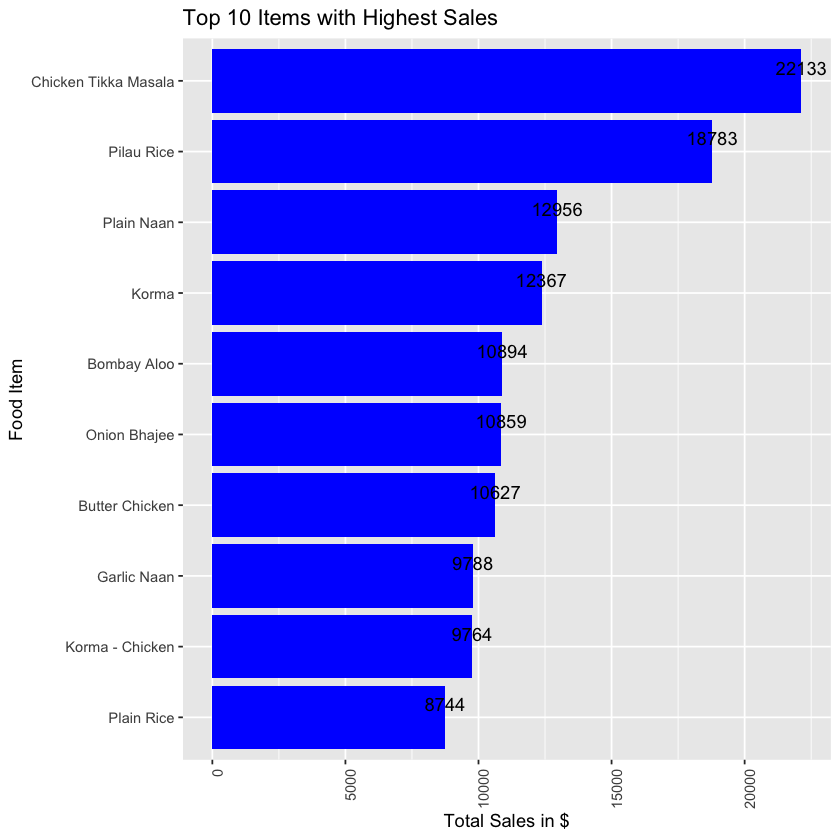

In [50]:
# Load the necessary libraries
library(ggplot2)

# Group the orders by Item Name and calculate the total sales for each item
order_summary <- aggregate(Total.Sales ~ Item.Name, data = data, sum)

# Sort the order_summary dataframe by Total Sales in descending order
order_summary <- order_summary[order(order_summary$Total.Sales, decreasing = TRUE), ]

# Select the top 10 food items with the highest sales
top_10_items <- head(order_summary, 10)

# Create the bar graph
ggplot(data = top_10_items, aes(x = reorder(Item.Name, Total.Sales), y = Total.Sales)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Food Item", y = "Total Sales in $", title = "Top 10 Items with Highest Sales") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_text(aes(label = round(Total.Sales)), vjust = -0.5) +
  coord_cartesian(clip = "off") +
  coord_flip()


## Items with the least sales

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


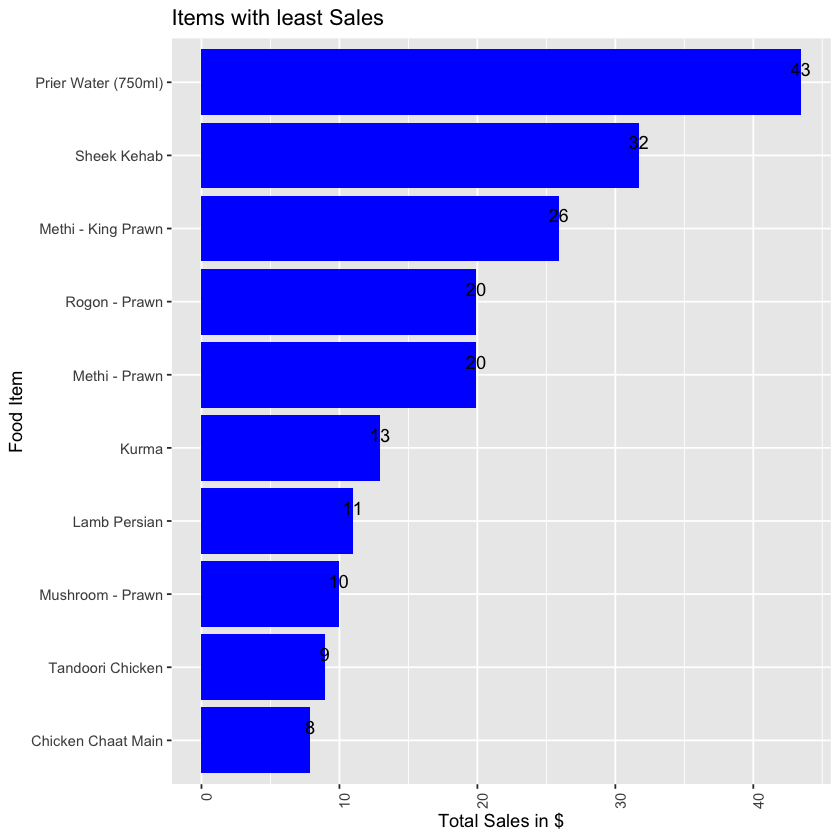

In [51]:
# Load the necessary libraries
library(ggplot2)

# Group the orders by Item Name and calculate the total sales for each item
order_summary <- aggregate(Total.Sales ~ Item.Name, data = data, sum)

# Sort the order_summary dataframe by Total Sales in descending order
order_summary <- order_summary[order(order_summary$Total.Sales, decreasing = TRUE), ]

# Select the top 10 food items with the highest sales
top_10_items <- tail(order_summary, 10)

# Create the bar graph
ggplot(data = top_10_items, aes(x = reorder(Item.Name, Total.Sales), y = Total.Sales)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Food Item", y = "Total Sales in $", title = "Items with least Sales") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_text(aes(label = round(Total.Sales)), vjust = -0.5) +
  coord_cartesian(clip = "off") +
  coord_flip()

## Busiest time

In [52]:
# Count the number of sales for each hour
hourly_sales <- table(data$Time)

# Find the most selling hour
most_selling_hour <- names(hourly_sales)[which.max(hourly_sales)]

# Print the result
print(paste("The most selling hour is:", most_selling_hour))


[1] "The most selling hour is: 18:52"


In [62]:
# Count the number of sales for each hour
hourly_sales <- table(data$Time)

# Find the busiest time (hour with the highest number of sales)
busiest_time <- names(hourly_sales)[which.max(hourly_sales)]

# Define a function to convert the time to 12-hour format
convert_to_12_hour <- function(time) {
  hour <- as.numeric(substr(time, 1, 2))
  
  if (hour == 0) {
    return("12 am")
  } else if (1 <= hour <= 11) {
    return(paste(hour, "am", sep = " "))
  } else if (hour == 12) {
    return("12 pm")
  } else {
    return(paste(hour - 12, "pm", sep = " "))
  }
}

# Format the busiest time to 12-hour format
formatted_time <- convert_to_12_hour(busiest_time)

# Print the result
cat("The busiest time is:", formatted_time, "\n")


ERROR: Error in parse(text = x, srcfile = src): <text>:13:24: unexpected '<='
12:     return("12 am")
13:   } else if (1 <= hour <=
                           ^


# Sales Trends Over Years

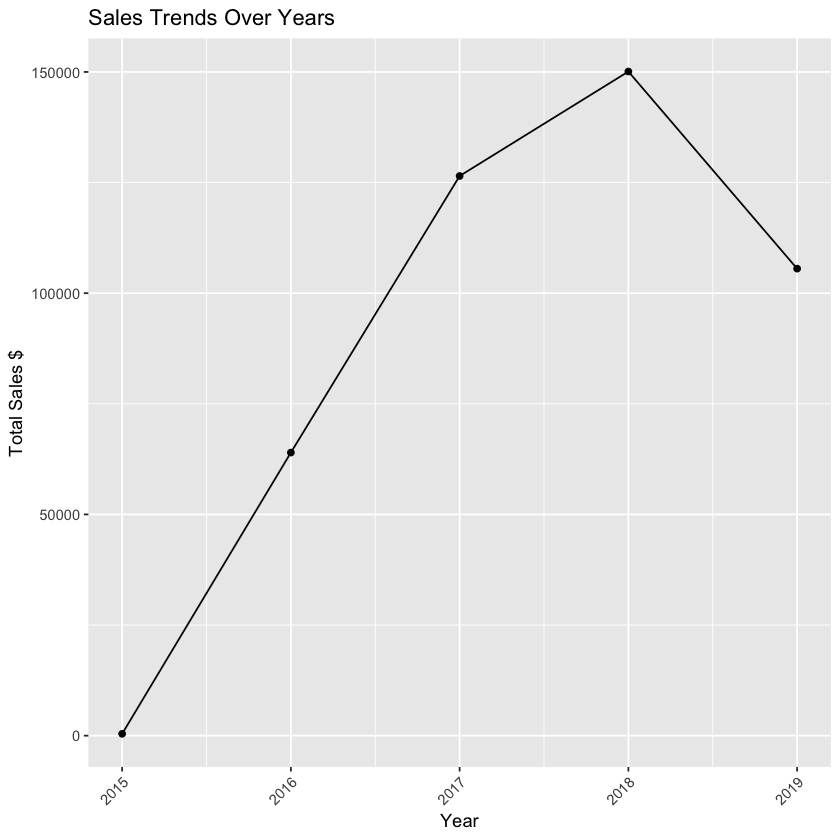

In [53]:
# Load the necessary libraries
library(ggplot2)

# Group the sales data by year and calculate the total sales for each year
sales_per_year <- aggregate(`Total.Sales` ~ Year, data = data, sum)

# Plot the line graph
ggplot(data = sales_per_year, aes(x = Year, y = `Total.Sales`)) +
  geom_line() +
  geom_point() +
  labs(x = "Year", y = "Total Sales $") +
  ggtitle("Sales Trends Over Years") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
  # Save the plot to a file with the desired size
ggsave("plot.jpg", width = 1, height = 1, dpi = 100)


# Sales Trends by Month

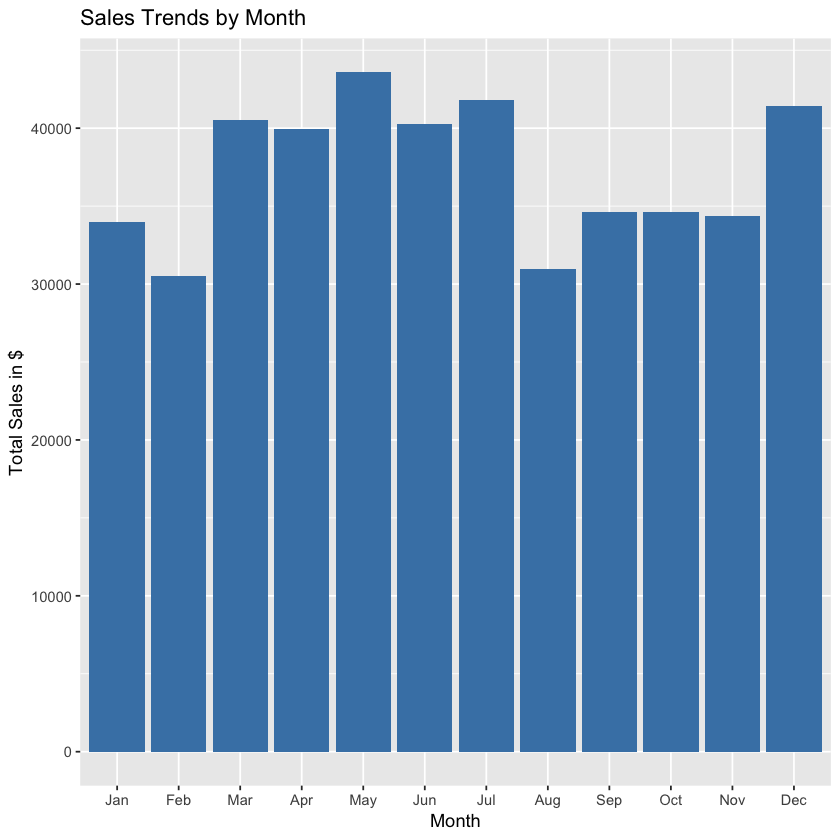

In [54]:
# Load the necessary libraries
library(ggplot2)

# Group the sales data by month and calculate the total sales for each month
sales_per_month <- aggregate(`Total.Sales` ~ Month, data = data, sum)

# Plot the bar graph
ggplot(data = sales_per_month, aes(x = Month, y = `Total.Sales`)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Month", y = "Total Sales in $") +
  ggtitle("Sales Trends by Month")

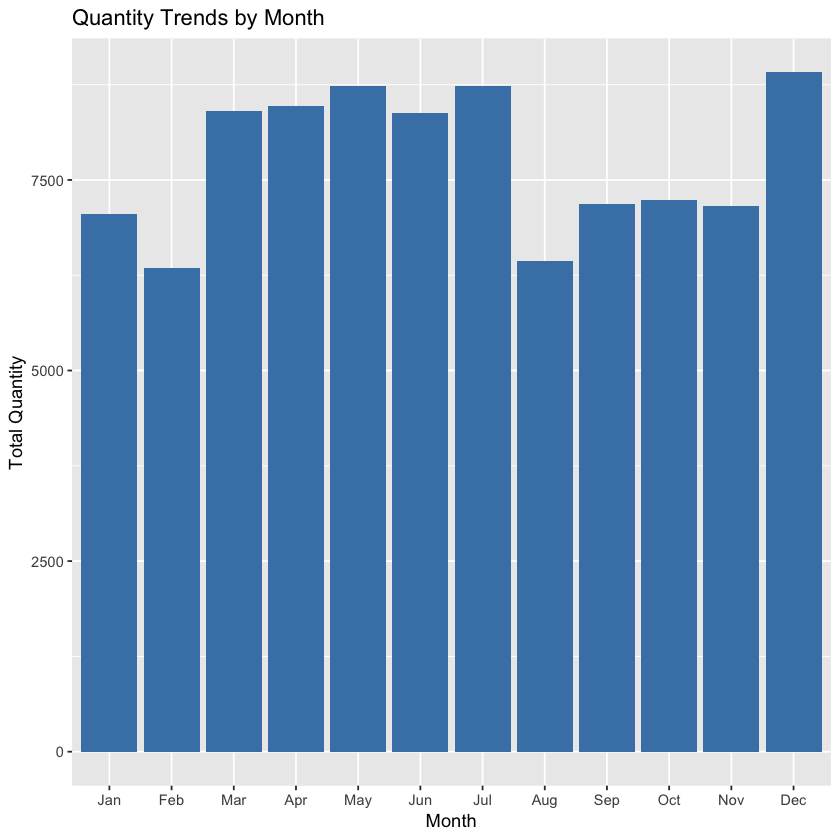

In [60]:
# Load the necessary libraries
library(ggplot2)

# Group the data by month and calculate the total quantity for each month
#quantity_per_month <- aggregate(Quantity ~ Month, data = data, sum)

# Count the number of orders for each month
orders_per_month <- table(data$Month)

# Sort the table by month in ascending order
orders_per_month <- orders_per_month[order(as.Date(names(orders_per_month), format = "%B"))]

# Print the result
#print(orders_per_month)


# Plot the bar graph
ggplot(data = orders_per_month, aes(x = Month, y = Quantity)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Month", y = "Total Quantity") +
  ggtitle("Quantity Trends by Month")


# Sales Trends by Days

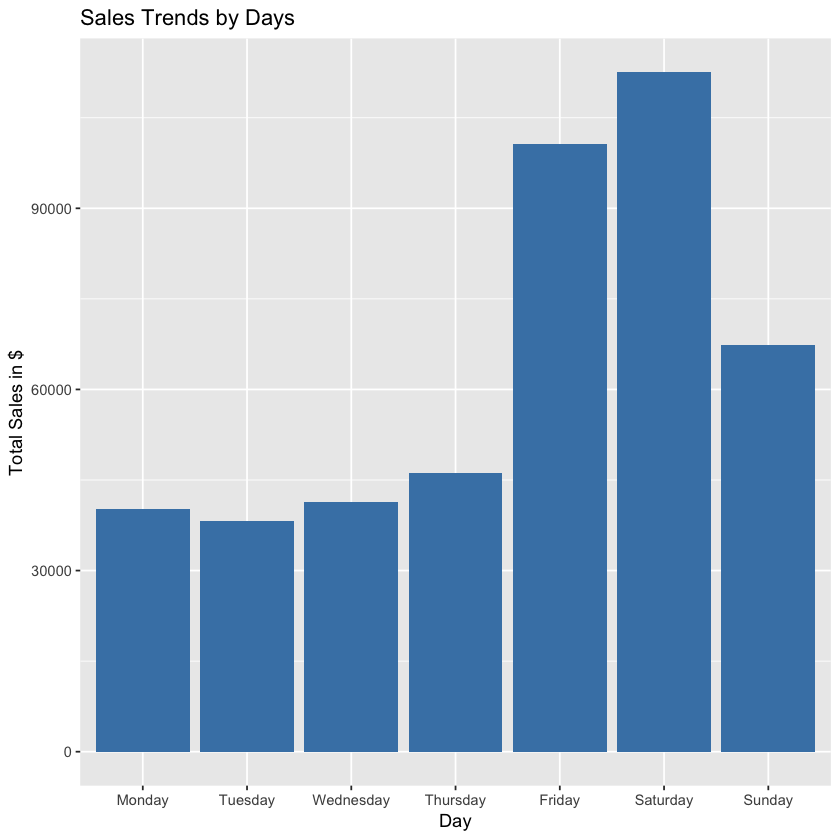

In [55]:
# Load the necessary libraries
library(ggplot2)

# Define the order of the days of the week
day_order <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

# Group the sales data by day and calculate the total sales for each day
sales_per_day <- aggregate(`Total.Sales` ~ Day, data = data, sum)

# Convert the "Day" variable to a factor with the desired order
sales_per_day$Day <- factor(sales_per_day$Day, levels = day_order)

# Plot the bar graph with the ordered days
ggplot(data = sales_per_day, aes(x = Day, y = `Total.Sales`)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Day", y = "Total Sales in $") +
  ggtitle("Sales Trends by Days")


In [63]:
# Filter the data for the years 2015 to 2019
df_filtered <- data[data$Year >= 2015 & data$Year <= 2019, ]

# Group the data by year and month and calculate the total sales
monthly_sales <- aggregate(Total.Sales ~ Year + Month, data = df_filtered, sum)

# Create a new column 'Month Year' combining the month and year
monthly_sales$Month.Year <- paste(monthly_sales$Month, monthly_sales$Year, sep = "-")

# Define the order of the months
month_order <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

# Sort the data by year and month using the custom order
monthly_sales$Month <- factor(monthly_sales$Month, levels = month_order, ordered = TRUE)
monthly_sales <- monthly_sales[order(monthly_sales$Year, monthly_sales$Month), ]

# Create a separate graph for each year
years <- unique(monthly_sales$Year)

for (year in years) {
  # Filter the data for the current year
  year_data <- monthly_sales[monthly_sales$Year == year, ]
  
  # Set the x-axis range and labels
  x <- 1:nrow(year_data)
  x_labels <- year_data$Month.Year
  
  # Plot the line graph for the current year
  plot(x, year_data$Total.Sales, type = "o", xlab = "Month", ylab = "Total Sales",
       main = paste("Sales Trends Over Months -", year), xaxt = "n")
  axis(1, at = x, labels = x_labels, las = 2)
  
  # Display the graph for the current year
  dev.new()
}


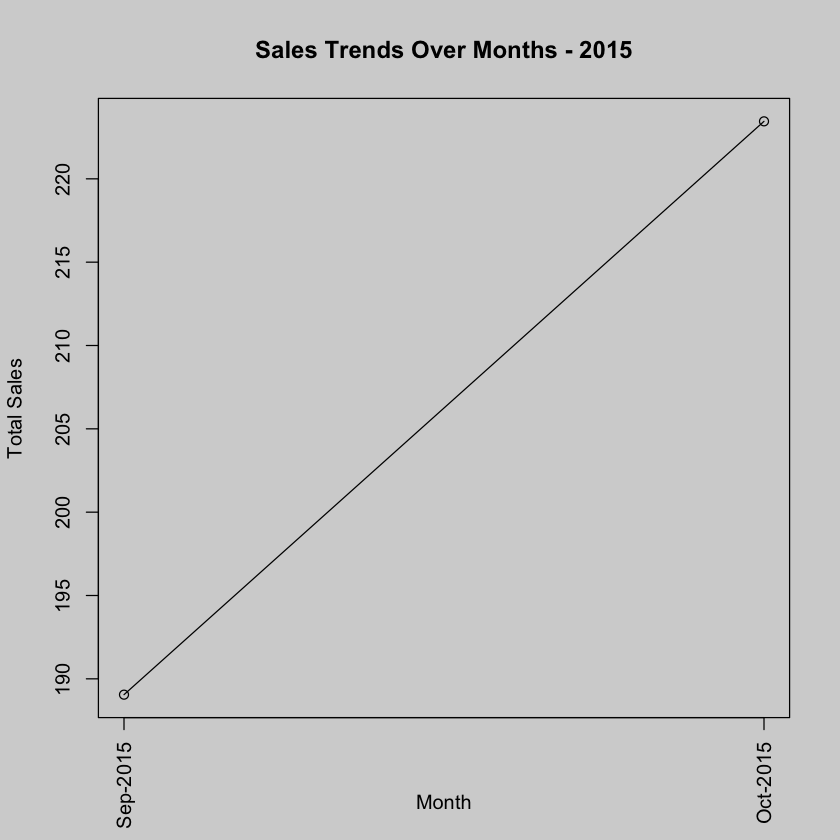

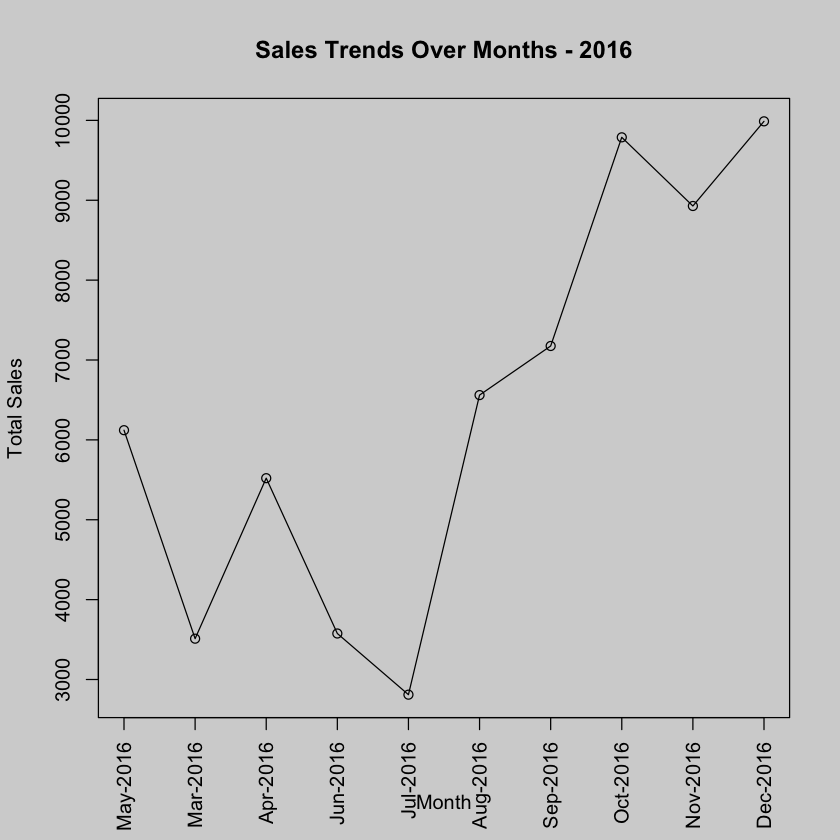

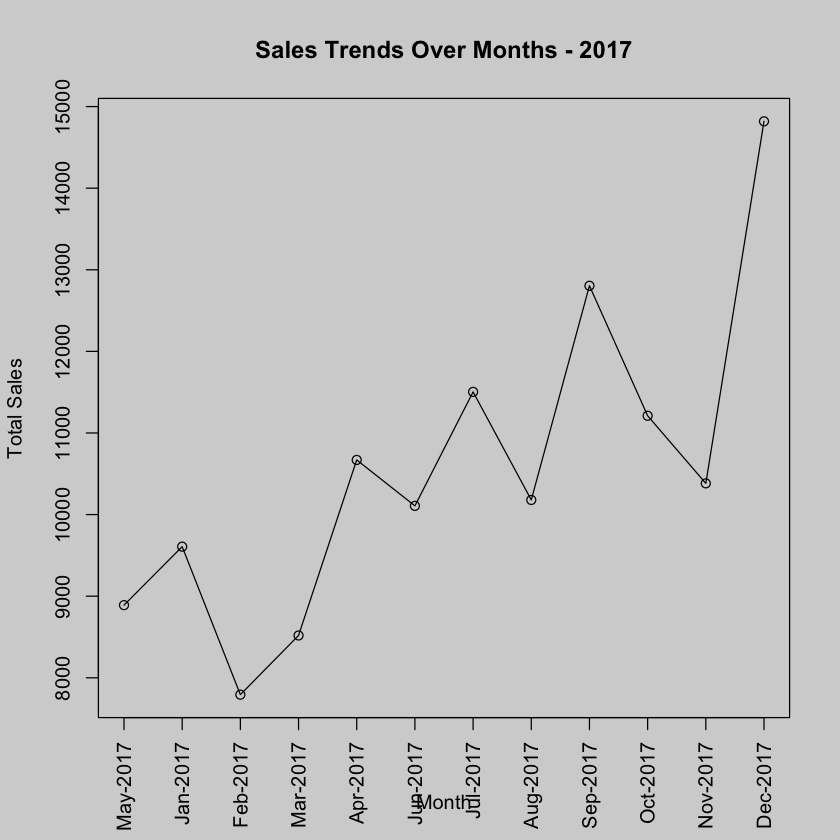

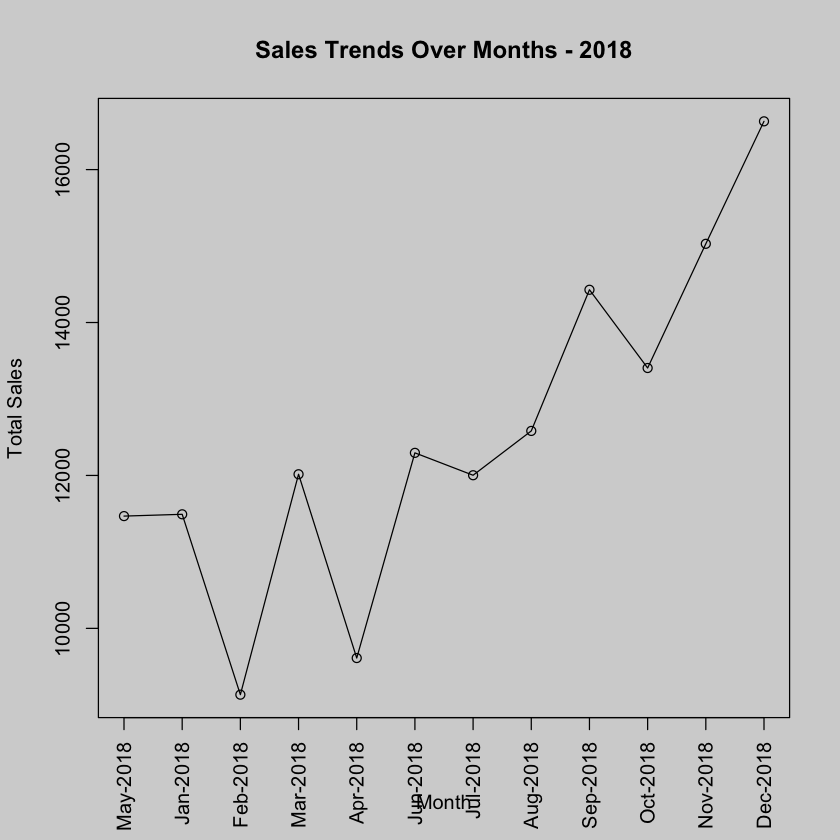

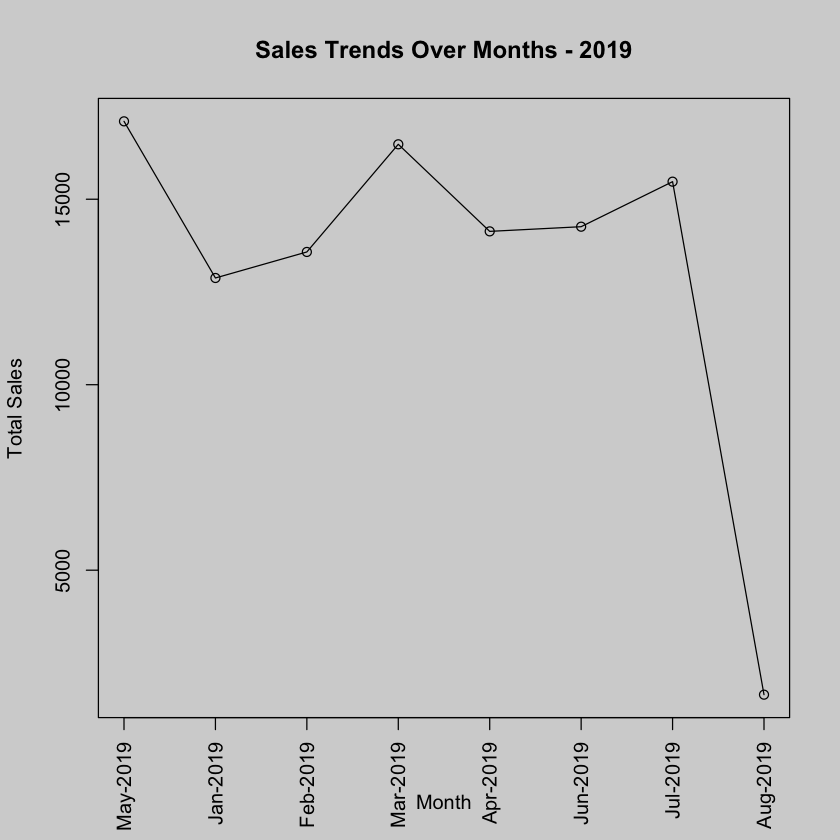

In [77]:
# Filter the data for the years 2015 to 2019
df_filtered <- data[data$Year >= 2015 & data$Year <= 2019, ]

# Group the data by year and month and calculate the total sales
monthly_sales <- aggregate(Total.Sales ~ Year + Month, data = df_filtered, sum)

# Reset the index
monthly_sales <- data.frame(monthly_sales)

# Create a new column 'Month Year' combining the month and year
monthly_sales$Month_Year <- paste(monthly_sales$Month, monthly_sales$Year, sep = "-")

# Define the order of the months
month_order <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

# Sort the data by year and month using the custom order
monthly_sales$Month <- factor(monthly_sales$Month, levels = month_order, ordered = TRUE)
monthly_sales <- monthly_sales[order(monthly_sales$Year, monthly_sales$Month), ]

# Create a separate graph for each year
years <- unique(monthly_sales$Year)

for (year in years) {
  # Filter the data for the current year
  year_data <- monthly_sales[monthly_sales$Year == year, ]

  # Set the x-axis range and labels
  x <- 1:nrow(year_data)
  x_labels <- year_data$Month_Year

  # Set the background color
  par(bg = "lightgray")

  # Plot the line graph for the current year
  plot(x, year_data$Total.Sales, type = "o", xlab = "Month", ylab = "Total Sales", 
       main = paste("Sales Trends Over Months -", year), xaxt = "n")
  axis(1, at = x, labels = x_labels, las = 2)

  # Display the graph for the current year
  dev.new()
  dev.off()
}
